## 1.  Откроем файл с данными и изучим общую информацию

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 1.1. Импорт библиотек pandas, numpy, datetime, matplotlib.pyplot, seaborn

In [37]:
import pandas as pd
from numpy import median
from datetime import datetime as dt
from matplotlib import pyplot as plt
import seaborn as sns
import math as mth
from folium import Marker, Map, Choropleth
from folium.plugins import MarkerCluster
import json
from plotly import graph_objects as go
import plotly.express as px
pd.set_option('display.max_columns', None) #настройка, чтобы pandas не урезал столбцы

### 1.2. Загрузим данные из CSV-файла, в качестве разделителя знак табуляции \t

In [38]:
data = pd.read_csv('/content/drive/MyDrive/Data/moscow_places.csv')

### 1.3. Изучим данные в датафреме data

In [39]:
display(data.head(10))
data.info();

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats
0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",55.878494,37.478860,5.0,NaN,NaN,NaN,NaN,0,NaN
1,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",55.875801,37.484479,4.5,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,0,4.0
2,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",55.889146,37.525901,4.6,средние,Средний счёт:от 1000 ₽,1000.0,NaN,0,45.0
3,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",55.881608,37.488860,5.0,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,0,NaN
4,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",55.881166,37.449357,5.0,средние,Средний счёт:400–600 ₽,500.0,NaN,1,148.0
5,Sergio Pizza,пиццерия,"Москва, Ижорская улица, вл8Б",Северный административный округ,"ежедневно, 10:00–23:00",55.888010,37.509573,4.6,средние,NaN,NaN,NaN,0,NaN
6,Огни города,"бар,паб","Москва, Клязьминская улица, 9, стр. 3",Северный административный округ,пн 15:00–04:00; вт-вс 15:00–05:00,55.890752,37.524653,4.4,средние,Средний счёт:199 ₽,199.0,NaN,0,45.0
7,Mr. Уголёк,быстрое питание,"Москва, Клязьминская улица, 9, стр. 3",Северный административный округ,"пн-чт 10:00–22:00; пт,сб 10:00–23:00; вс 10:00...",55.890636,37.524303,4.7,средние,Средний счёт:200–300 ₽,250.0,NaN,0,45.0
8,Donna Maria,ресторан,"Москва, Дмитровское шоссе, 107, корп. 4",Северный административный округ,"ежедневно, 10:00–22:00",55.880045,37.539006,4.8,средние,Средний счёт:от 500 ₽,500.0,NaN,0,79.0
9,Готика,кафе,"Москва, Ангарская улица, 39",Северный административный округ,"ежедневно, 12:00–00:00",55.879038,37.524487,4.3,средние,Средний счёт:1000–1200 ₽,1100.0,NaN,0,65.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8406 non-null   object 
 1   category           8406 non-null   object 
 2   address            8406 non-null   object 
 3   district           8406 non-null   object 
 4   hours              7870 non-null   object 
 5   lat                8406 non-null   float64
 6   lng                8406 non-null   float64
 7   rating             8406 non-null   float64
 8   price              3315 non-null   object 
 9   avg_bill           3816 non-null   object 
 10  middle_avg_bill    3149 non-null   float64
 11  middle_coffee_cup  535 non-null    float64
 12  chain              8406 non-null   int64  
 13  seats              4795 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 919.5+ KB


## 2. Предобработка данных

### 2.1. Изучим, есть ли в данных дубликаты и пропуски

In [40]:
print(data.isna().sum()); #ищем пропуски

name                    0
category                0
address                 0
district                0
hours                 536
lat                     0
lng                     0
rating                  0
price                5091
avg_bill             4590
middle_avg_bill      5257
middle_coffee_cup    7871
chain                   0
seats                3611
dtype: int64


In [41]:
data['hours'] = data['hours'].fillna('не определено') #заменим пропуски в столбце hours на "не определено"
data['price'] = data['price'].fillna('не определено') #заменим пропуски в столбце price на "не определено"
data['avg_bill'] = data['avg_bill'].fillna('не определено') #заменим пропуски в столбце avg_bill на "не определено"

Пропуски в столбцах middle_avg_bill, middle_coffee_cup и seats заменить медианой/средним/нулем или другим значением мы не можем, поскольку для этого недостаточно инофрмации. Пропусков много (больше 50% от датафрема), поэтому замена данных или удаление с большой вероятностью исказит данные. Поэтому оставляем стоблцы без изменений.

In [42]:
#создадим функцию, которая в столбце chain заменит числовые значения 0 и 1 на строковые 'несетевые' и 'сетевые'

def chain_categorize(i):
    x = i['chain']
    if x == 0:
        return 'несетевые'
    else:
        return 'сетевые'

data['chain'] = data.apply(chain_categorize, axis=1)

In [43]:
print(data['chain'].value_counts()) #выведем количество сетевых и несетевых заведений

несетевые    5201
сетевые      3205
Name: chain, dtype: int64


In [44]:
print(data.isna().sum()); #проверим пропуски

name                    0
category                0
address                 0
district                0
hours                   0
lat                     0
lng                     0
rating                  0
price                   0
avg_bill                0
middle_avg_bill      5257
middle_coffee_cup    7871
chain                   0
seats                3611
dtype: int64


In [45]:
print(data.duplicated().sum()) #ищем явные дубликаты

0


Явные дубликаты не обнаружены, поэтому поищем не явные в столбцах name и address

In [46]:
#для поиска дубликатов приведем все названия в столбцах name и address к нижнему регистру, и заменим Ё на Е
data['name'] = data['name'].str.lower()
data['address'] = data['address'].str.lower() #приводим данные к нижнему регистру
data = data.apply(lambda x:x.replace({'ё':'е'},regex=True)) #заменяем Ё на Е

In [47]:
print(data.duplicated(subset=['name','address']).sum())

4


Обнаружено 4 дубликата, что составляет около 0.05% от всего датафрема. Это совсем незначительное значение, поэтому данные строки удаляем.

In [48]:
data = data.drop_duplicates(subset=['name', 'address'], keep='first')
data = data.reset_index(drop=True) #выравниваем индексы

### 2.2. Создадим столбец street с названиями улиц из столбца с адресом

In [49]:
data['street'] = data['address'].str.split(", ", expand=True)[1] #создаем столбец с улицами street

### 2.3. Создадим столбец is_24/7 с обозначением, что заведение работает ежедневно и круглосуточно (24/7).

логическое значение True — если заведение работает ежедневно и круглосуточно; логическое значение False — в противоположном случае.

In [50]:
data['is_24/7'] = data['hours'].str.contains('ежедневно, круглосуточно')

In [51]:
display(data.head(10)) #выведем данные после изменений
data.info();

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats,street,is_24/7
0,wowфли,кафе,"москва, улица дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",55.878494,37.478860,5.0,не определено,не определено,NaN,NaN,несетевые,NaN,улица дыбенко,False
1,четыре комнаты,ресторан,"москва, улица дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",55.875801,37.484479,4.5,выше среднего,Средний счет:1500–1600 ₽,1550.0,NaN,несетевые,4.0,улица дыбенко,False
2,хазри,кафе,"москва, клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",55.889146,37.525901,4.6,средние,Средний счет:от 1000 ₽,1000.0,NaN,несетевые,45.0,клязьминская улица,False
3,dormouse coffee shop,кофейня,"москва, улица маршала федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",55.881608,37.488860,5.0,не определено,Цена чашки капучино:155–185 ₽,NaN,170.0,несетевые,NaN,улица маршала федоренко,False
4,иль марко,пиццерия,"москва, правобережная улица, 1б",Северный административный округ,"ежедневно, 10:00–22:00",55.881166,37.449357,5.0,средние,Средний счет:400–600 ₽,500.0,NaN,сетевые,148.0,правобережная улица,False
5,sergio pizza,пиццерия,"москва, ижорская улица, вл8б",Северный административный округ,"ежедневно, 10:00–23:00",55.888010,37.509573,4.6,средние,не определено,NaN,NaN,несетевые,NaN,ижорская улица,False
6,огни города,"бар,паб","москва, клязьминская улица, 9, стр. 3",Северный административный округ,пн 15:00–04:00; вт-вс 15:00–05:00,55.890752,37.524653,4.4,средние,Средний счет:199 ₽,199.0,NaN,несетевые,45.0,клязьминская улица,False
7,mr. уголек,быстрое питание,"москва, клязьминская улица, 9, стр. 3",Северный административный округ,"пн-чт 10:00–22:00; пт,сб 10:00–23:00; вс 10:00...",55.890636,37.524303,4.7,средние,Средний счет:200–300 ₽,250.0,NaN,несетевые,45.0,клязьминская улица,False
8,donna maria,ресторан,"москва, дмитровское шоссе, 107, корп. 4",Северный административный округ,"ежедневно, 10:00–22:00",55.880045,37.539006,4.8,средние,Средний счет:от 500 ₽,500.0,NaN,несетевые,79.0,дмитровское шоссе,False
9,готика,кафе,"москва, ангарская улица, 39",Северный административный округ,"ежедневно, 12:00–00:00",55.879038,37.524487,4.3,средние,Средний счет:1000–1200 ₽,1100.0,NaN,несетевые,65.0,ангарская улица,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8402 entries, 0 to 8401
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8402 non-null   object 
 1   category           8402 non-null   object 
 2   address            8402 non-null   object 
 3   district           8402 non-null   object 
 4   hours              8402 non-null   object 
 5   lat                8402 non-null   float64
 6   lng                8402 non-null   float64
 7   rating             8402 non-null   float64
 8   price              8402 non-null   object 
 9   avg_bill           8402 non-null   object 
 10  middle_avg_bill    3149 non-null   float64
 11  middle_coffee_cup  535 non-null    float64
 12  chain              8402 non-null   object 
 13  seats              4792 non-null   float64
 14  street             8402 non-null   object 
 15  is_24/7            8402 non-null   bool   
dtypes: bool(1), float64(6), 

## 3. Анализ данных

### 3.1. Определим, какие категории заведений представлены в данных. Исследуйем количество объектов общественного питания по категориям: рестораны, кофейни, пиццерии, бары и так далее. Построим визуализации.

In [52]:
print(data['category'].value_counts()) #Определим, какие категории представлены в данных

кафе               2376
ресторан           2042
кофейня            1413
бар,паб             764
пиццерия            633
быстрое питание     603
столовая            315
булочная            256
Name: category, dtype: int64


Самые многочисленные категории - кафе (28%), ресторан (24%) и кофейня (17%).

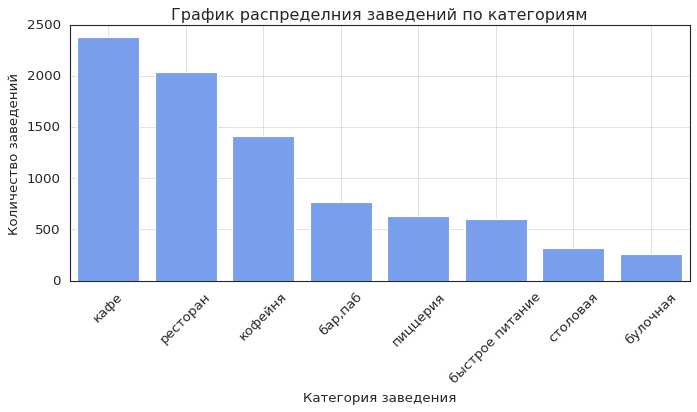

In [53]:
# группируем данные по категориям и количеству заведений
data_category = data.groupby(['category'],as_index = False)[['name']].count().\
                     sort_values(by='name', ascending=False)
# используем стиль white из библиотеки seaborn
sns.set_style('white')
# назначаем размер графика
plt.figure(figsize=(10, 4))
# строим столбчатый график средствами seaborn
sns.barplot(x='category', y='name', data=data_category, color='#6698ff')
# формируем заголовок графика и подписи осей средствами matplotlib
plt.title('График распределния заведений по категориям')
plt.xlabel('Категория заведения')
plt.ylabel('Количество заведений')
# поворачиваем подписи значений по оси X на 45 градусов
plt.xticks(rotation=45)
# добавляем сетку
plt.grid()
# отображаем график на экране
plt.show()

На графике видно, что самая многочисленная категория - кафе (более 2000 заведений), на втором месте - ресторан (2000 заведений), на третьем месте - кофейня (около 1500 заведений). Количество заведений таких категорий как бар.паб, быстрое питание и пиццерия около 600. Самые малочисленные категории - это булочная и столовая (не более 300 заведений).

### 3.2. Исследуем количество посадочных мест в местах по категориям: рестораны, кофейни, пиццерии, бары и так далее. Построим визуализации.

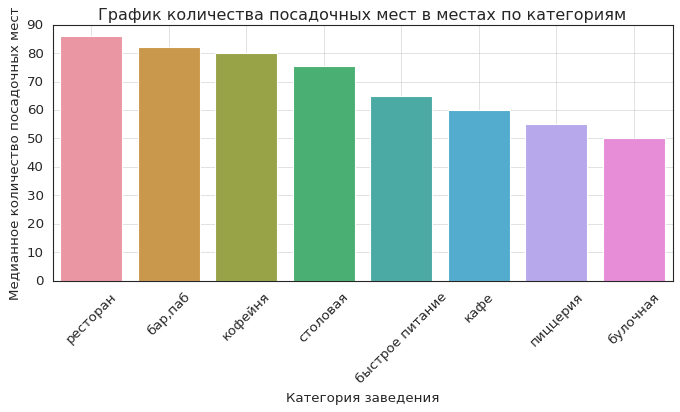

In [54]:
# группируем данные по категориям и посадочным местам
data_seats = data.groupby(['category'],as_index = False)[['seats']].median().\
                  sort_values(by='seats', ascending=False)
# используем стиль white из библиотеки seaborn
sns.set_style('white')
# назначаем размер графика
plt.figure(figsize=(10, 4))
# строим столбчатый график средствами seaborn
sns.barplot(x='category', y='seats', data=data_seats)
# формируем заголовок графика и подписи осей средствами matplotlib
plt.title('График количества посадочных мест в местах по категориям')
plt.xlabel('Категория заведения')
plt.ylabel('Медианное количество посадочных мест')
# поворачиваем подписи значений по оси X на 45 градусов
plt.xticks(rotation=45)
# добавляем сетку
plt.grid()
# отображаем график на экране
plt.show()

В ресторанах, барах.пабах и кофейнях около 80 посадочных мест в заведении (самые большие значения). Около 70 посадочных мест в столовых. Около 60 посадочных мест в заведениях быстрого питания и кафе. И около 50 посадочных мест в пиццерии и булочной.

### 3.3. Рассмотрим и изобразим соотношение сетевых и несетевых заведений в датасете.


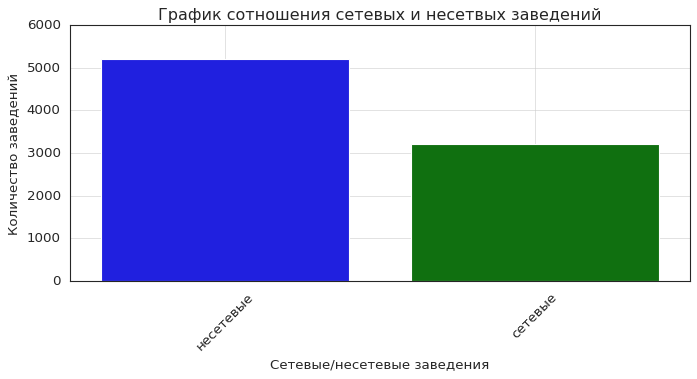

In [55]:
# группируем данные по сетевым/несетевым заведениям и количеству заведений
data_chain = data.groupby(['chain'],as_index = False)[['name']].count()
# используем стиль white из библиотеки seaborn
sns.set_style('white')
# назначаем размер графика
plt.figure(figsize=(10, 4))
# строим столбчатый график средствами seaborn
sns.barplot(x='chain', y='name', data=data_chain)
# формируем заголовок графика и подписи осей средствами matplotlib
plt.title('График сотношения сетевых и несетвых заведений')
plt.xlabel('Сетевые/несетевые заведения')
plt.ylabel('Количество заведений')
# поворачиваем подписи значений по оси X на 45 градусов
plt.xticks(rotation=45)
# добавляем сетку
plt.grid()
# отображаем график на экране
plt.show()

На графике видно, что несетевых заведений почти в половину больше, чем сетевых. Несетевых более 5000 заведений, а сетевых чуть больше 3000

### 3.4. Определим, какие категории заведений чаще являются сетевыми.

In [56]:
data_chain = data.groupby(['category', 'chain']).agg({'category': pd.Series.mode,
                                              'chain': pd.Series.mode,
                                              'name':'count'}).\
                     rename(columns={'name':'total_count'}).\
                     sort_values(by='total_count', ascending=False).\
                     reset_index(drop=True)
#найдем долю сетевых и несетевых заведений по категории
data_chain['share'] = data_chain.groupby('category')['total_count'].transform(lambda x: x/x. sum())
data_chain['share'] = round(data_chain['share']*100, 2)

data_chain

,category,chain,total_count,share
0,кафе,несетевые,1597,67.21
1,ресторан,несетевые,1313,64.30
2,кафе,сетевые,779,32.79
3,ресторан,сетевые,729,35.70
4,кофейня,сетевые,720,50.96
5,кофейня,несетевые,693,49.04
6,"бар,паб",несетевые,596,78.01
7,быстрое питание,несетевые,371,61.53
8,пиццерия,сетевые,330,52.13
9,пиццерия,несетевые,303,47.87


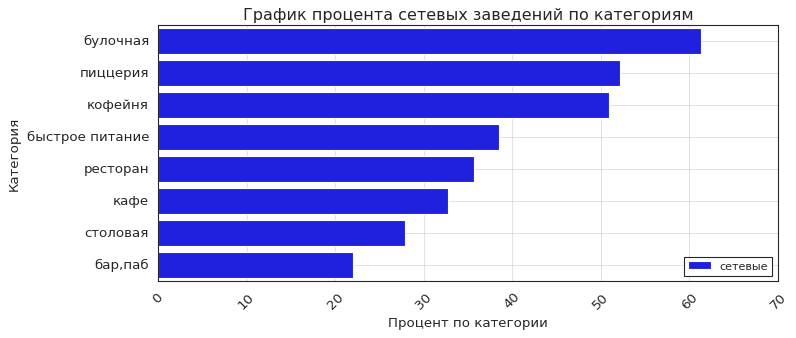

In [57]:
# группируем данные по сетевым заведениям и категориям и считаем долю
data_chain_yes = data_chain.query('chain == "сетевые"').groupby(['category'], \
                            as_index = False).agg({'category': pd.Series.mode,
                                               'chain': pd.Series.mode,
                                               'share': pd.Series.mode,
                                               'total_count':'sum'}).\
                            sort_values(by='share', ascending=False)
# используем стиль white из библиотеки seaborn
sns.set_style('white')
# назначаем размер графика
plt.figure(figsize=(10, 4))
# строим столбчатый график средствами seaborn
sns.barplot(x='share', y='category', data=data_chain_yes, hue='chain')
# формируем заголовок графика и подписи осей средствами matplotlib
plt.title('График процента сетевых заведений по категориям')
plt.xlabel('Процент по категории')
plt.ylabel('Категория')
# поворачиваем подписи значений по оси X на 45 градусов
plt.xticks(rotation=45)
# выбираем положение легенды и указываем размер шрифта
plt.legend(loc='lower right', fontsize=10)
# добавляем сетку
plt.grid()
# отображаем график на экране
plt.show()

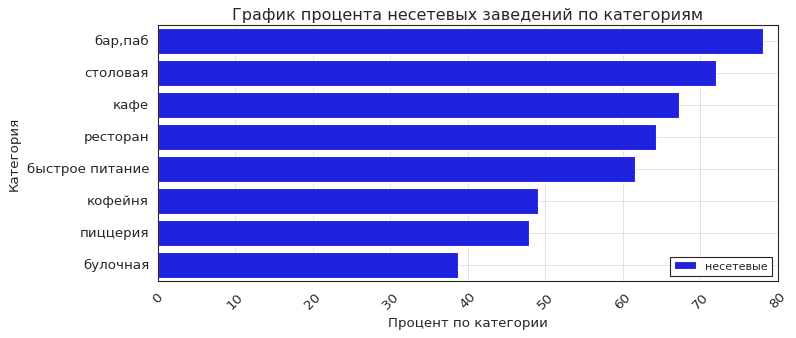

In [58]:
# группируем данные по несетевым заведениям и категориям и считаем долю
data_chain_no = data_chain.query('chain == "несетевые"').groupby(['category'], \
                            as_index = False).agg({'category': pd.Series.mode,
                                               'chain': pd.Series.mode,
                                               'share': pd.Series.mode,
                                               'total_count':'sum'}).\
                            sort_values(by='share', ascending=False)
# используем стиль white из библиотеки seaborn
sns.set_style('white')
# назначаем размер графика
plt.figure(figsize=(10, 4))
# строим столбчатый график средствами seaborn
sns.barplot(x='share', y='category', data=data_chain_no, hue='chain')
# формируем заголовок графика и подписи осей средствами matplotlib
plt.title('График процента несетевых заведений по категориям')
plt.xlabel('Процент по категории')
plt.ylabel('Категория')
# поворачиваем подписи значений по оси X на 45 градусов
plt.xticks(rotation=45)
# выбираем положение легенды и указываем размер шрифта
plt.legend(loc='lower right', fontsize=10)
# добавляем сетку
plt.grid()
# отображаем график на экране
plt.show()

Согласно графику сетевыми чаще являются кафейни, пиццерии и булочные. Реже всего сетевыми являются кафе, рестораны и бар.пабы.
Заведения быстрого питания и столовые в половину реже являются сетевыми.

### 3.5. Сгруппируем данные по названиям заведений и найдем топ-15 популярных сетей в Москве (т.е. количество заведений этой сети в регионе).

In [59]:
name_top15 = data.query('chain == "сетевые"').\
                  groupby('name').agg({'name': pd.Series.mode,
                                       'district':'count'}).\
                  rename(columns={'district':'total_count'}).\
                  sort_values(by='total_count', ascending=False).\
                  reset_index(drop=True).head(15)
name_top15

,name,total_count
0,шоколадница,120
1,домино'с пицца,76
2,додо пицца,74
3,one price coffee,71
4,яндекс лавка,69
5,cofix,65
6,prime,50
7,хинкальная,44
8,кофепорт,42
9,кулинарная лавка братьев караваевых,39


In [60]:
# строим столбчатую диаграмму
fig = px.bar(name_top15.sort_values(by='total_count', ascending=True), # загружаем данные и заново их сортируем
             x='total_count', # указываем столбец с данными для оси X
             y='name', # указываем столбец с данными для оси Y
             text='total_count', # добавляем аргумент, который отобразит текст с информацией
             color_discrete_sequence=["#b65fcf"])

# оформляем график
fig.update_layout(title='Категории самых популярных сетей Москвы, входящих в топ-15',
                   xaxis_title='Количество заведений',
                   yaxis_title='Категории')
fig.show() # выводим график

На графике видно, что самой популярной сетью является Шоколадница (14% от количества заведений, входящих в топ-15). Меньше всего заведений сети Му-Му (3.31 % от количества заведений, входящих в топ-15).

In [61]:
name_top15_list = name_top15['name'] #создадим список с наименованиями заведений, входящих в топ-15 по Москве

In [62]:
name_top15_v2 = data.query('name in @name_top15_list & chain == "сетевые"').\
                  groupby('category').agg({'category': pd.Series.mode,
                                       'name':'count'}).\
                  rename(columns={'name':'total_count'}).\
                  sort_values(by='total_count', ascending=False).\
                  reset_index(drop=True)
name_top15_v2

,category,total_count
0,кофейня,336
1,ресторан,186
2,пиццерия,151
3,кафе,100
4,булочная,25
5,быстрое питание,12
6,"бар,паб",4
7,столовая,2


In [63]:
# строим столбчатую диаграмму
fig = px.bar(name_top15_v2.sort_values(by='total_count', ascending=True), # загружаем данные и заново их сортируем
             x='total_count', # указываем столбец с данными для оси X
             y='category', # указываем столбец с данными для оси Y
             text='total_count', # добавляем аргумент, который отобразит текст с информацией
             color_discrete_sequence=["#e25c95"])

# оформляем график
fig.update_layout(title='Категории самых популярных сетей Москвы, входящих в топ-15',
                   xaxis_title='Количество заведений',
                   yaxis_title='Категории')
fig.show() # выводим график

Исправления внесены. По столбчатой диаграмме видно, что самые популярные сети чаще всего имеют категорию кофейни (336 заведений). На втором месте - рестораны (186 заведений), на третьем - пиццерии (151 заведение)


### 3.6. Определим, какие административные районы Москвы присутствуют в датасете. Отобразим общее количество заведений и количество заведений каждой категории по районам.

In [64]:
print(data['district'].value_counts()) #Определим, какие административные районы Москвы присутствуют в датасете

Центральный административный округ         2242
Северный административный округ             898
Южный административный округ                892
Северо-Восточный административный округ     890
Западный административный округ             850
Восточный административный округ            798
Юго-Восточный административный округ        714
Юго-Западный административный округ         709
Северо-Западный административный округ      409
Name: district, dtype: int64


In [65]:
districts = data.groupby(['district', 'category']).agg({'category': pd.Series.mode,
                                                           'district': pd.Series.mode,
                                                           'name':'count'}).\
                  rename(columns={'name':'total_count'}).\
                  sort_values(by='total_count', ascending=False).\
                  reset_index(drop=True)
#найдем долю заведений каждой категории по районам
districts['share'] = districts.groupby('district')['total_count'].transform(lambda x: x/x. sum())
districts['share'] = round(districts['share']*100, 2)

districts

,category,district,total_count,share
0,ресторан,Центральный административный округ,670,29.88
1,кафе,Центральный административный округ,464,20.70
2,кофейня,Центральный административный округ,428,19.09
3,"бар,паб",Центральный административный округ,364,16.24
4,кафе,Юго-Восточный административный округ,282,39.50
...,...,...,...,...
67,"бар,паб",Северо-Западный административный округ,23,5.62
68,столовая,Северо-Западный административный округ,18,4.40
69,столовая,Юго-Западный административный округ,17,2.40
70,булочная,Юго-Восточный административный округ,13,1.82


In [66]:
# строим столбчатую диаграмму
fig = px.bar(districts.sort_values(by='total_count', ascending=True), # загружаем данные и заново их сортируем
             x='share', # указываем столбец с данными для оси X
             y='district', # указываем столбец с данными для оси Y
             text='share', # добавляем аргумент, который отобразит текст с информацией
             color='category')

# оформляем график
fig.update_layout(title='Категории заведений по районам Москвы',
                   xaxis_title='Процент заведений',
                   yaxis_title='Районы')
fig.show() # выводим график

Если смотреть в каком соотношении распредлены категории заведений в каждом отдельном районе, то можено увидеть следующее:
Почти во всех районах больше всего доля кафе (около 30-35% от всех заведений данного райноа), на втором месте рестораны, доля которых составляет примерно 20-25%. На третьем месте кофейни (около 15%)

### 3.7. Визуализируме распределение средних рейтингов по категориям заведений.

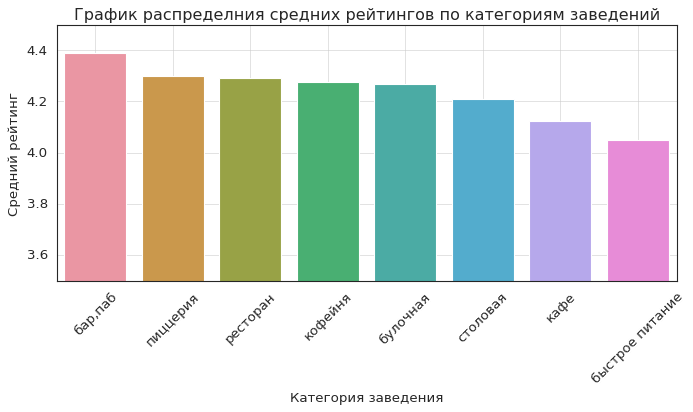

In [67]:
# группируем данные по категориям и рейтингу заведений
category_avg_rating = data.groupby('category', as_index = False)['rating'].agg('mean').\
                           sort_values(by='rating', ascending=False)
# назначаем классический стиль для графика с помощью matplotlib
plt.style.use('classic')
# используем стиль white из библиотеки seaborn
sns.set_style('white')
# назначаем размер графика
plt.figure(figsize=(10, 4))
plt.ylim(3.5, 4.5)
# строим столбчатый график средствами seaborn
sns.barplot(x='category', y='rating', data=category_avg_rating)
# формируем заголовок графика и подписи осей средствами matplotlib
plt.title('График распределния средних рейтингов по категориям заведений')
plt.xlabel('Категория заведения')
plt.ylabel('Средний рейтинг')
# поворачиваем подписи значений по оси X на 45 градусов
plt.xticks(rotation=45)
# добавляем сетку
plt.grid()
# отображаем график на экране
plt.show()

После изменения масштаба видим следующее:
самый низкий рейтинг (примерно 4 и 4.1) у заведений категории быстрого питания и кафе. Самый высокий рейтинг у баров/пабов (около 4.4). У остальных категорий заведений рейтинг от 4.2 до 4.3

### 3.8. Построим фоновую картограмму (хороплет) со средним рейтингом заведений каждого района. Границы районов Москвы, которые встречаются в датасете, хранятся в файле admin_level_geomap.geojson.

In [68]:
rating_data = data.groupby('district', as_index=False)['rating'].agg('mean').\
                   sort_values(by='rating', ascending=False)
rating_data

,district,rating
5,Центральный административный округ,4.377520
2,Северный административный округ,4.240980
4,Северо-Западный административный округ,4.208802
8,Южный административный округ,4.184417
1,Западный административный округ,4.181647
0,Восточный административный округ,4.174185
7,Юго-Западный административный округ,4.172920
3,Северо-Восточный административный округ,4.147978
6,Юго-Восточный административный округ,4.101120


In [69]:
# загружаем JSON-файл с границами округов Москвы
state_geo = '/content/drive/MyDrive/Data/admin_level_geomap.geojson'
# moscow_lat - широта центра Москвы, moscow_lng - долгота центра Москвы
moscow_lat, moscow_lng = 55.751244, 37.618423

# создаём карту Москвы
m = Map(location=[moscow_lat, moscow_lng], zoom_start=10)

# создаём хороплет с помощью конструктора Choropleth и добавляем его на карту
Choropleth(
    geo_data=state_geo,
    data=rating_data,
    columns=['district', 'rating'],
    key_on='feature.name',
    fill_color='GnBu',
    fill_opacity=0.8,
    legend_name='Средний рейтинг заведений по районам',
).add_to(m)

# выводим карту
m

На хороплете видно, что самый высокий рейтинг у заведений в Центральном АО, немного меньше ретинги у заведений в Северном и Северо-Западном АО. Самый низкий рейтинг у заведений в Юго-Восточном АО.

### 3.9. Отобразим все заведения датасета на карте с помощью кластеров средствами библиотеки folium.

In [70]:
# moscow_lat - широта центра Москвы, moscow_lng - долгота центра Москвы
moscow_lat, moscow_lng = 55.751244, 37.618423

# создаём карту Москвы
m = Map(location=[moscow_lat, moscow_lng], zoom_start=10)
# создаём пустой кластер, добавляем его на карту
marker_cluster = MarkerCluster().add_to(m)

# пишем функцию, которая принимает строку датафрейма,
# создаёт маркер в текущей точке и добавляет его в кластер marker_cluster
def create_clusters(row):
    Marker(
        [row['lat'], row['lng']],
        popup=f"{row['name']} {row['rating']}",
    ).add_to(marker_cluster)

# применяем функцию create_clusters() к каждой строке датафрейма
data.apply(create_clusters, axis=1)

# выводим карту
m

Output hidden; open in https://colab.research.google.com to view.

### 3.10. Найдем топ-15 улиц по количеству заведений. Построим график распределения количества заведений и их категорий по этим улицам.

In [71]:
# сделаем группировку по улице, посчитаем количество заведений, выделим топ-15 улиц
street_top15 = data.groupby('street').agg({'street': pd.Series.mode,
                                                        'name':'count',}).\
                  rename(columns={'name':'total_count'}).\
                  sort_values(by='total_count', ascending=False).\
                  reset_index(drop=True).head(15)
street_top15

,street,total_count
0,проспект мира,183
1,профсоюзная улица,122
2,проспект вернадского,108
3,ленинский проспект,107
4,ленинградский проспект,95
5,дмитровское шоссе,88
6,каширское шоссе,77
7,варшавское шоссе,76
8,ленинградское шоссе,70
9,мкад,65


In [72]:
street_top15_list = street_top15['street'] #создадим список с наименованиями улиц, входящих в топ-15 по Москве

In [73]:
street_top15_v2 = data.query('street in @street_top15_list').\
                  groupby(['street','category']).agg({'category': pd.Series.mode,
                                                      'street': pd.Series.mode,
                                                      'name':'count'}).\
                  rename(columns={'name':'total_count'}).\
                  sort_values(by='total_count', ascending=False).\
                  reset_index(drop=True)
street_top15_v2

,category,street,total_count
0,кафе,проспект мира,53
1,кафе,мкад,45
2,ресторан,проспект мира,45
3,кофейня,проспект мира,36
4,кафе,профсоюзная улица,35
...,...,...,...
106,пиццерия,люблинская улица,1
107,булочная,проспект вернадского,1
108,столовая,мкад,1
109,булочная,кутузовский проспект,1


In [74]:
# строим столбчатую диаграмму
fig = px.bar(street_top15_v2.sort_values(by='total_count', ascending=True), # загружаем данные и заново их сортируем
             x='total_count', # указываем столбец с данными для оси X
             y='street', # указываем столбец с данными для оси Y
             text='category', # добавляем аргумент, который отобразит текст с информацией
             color='category')
fig.update_layout(yaxis={'categoryorder':'total descending'}) # сротировка графика
# оформляем график
fig.update_layout(title='Топ-15 улиц с наибольшим количеством заведений по категориям',
                   xaxis_title='Количество заведений',
                   yaxis_title='Категории')
fig.show() # выводим график

Самое большое количество заведений на проспекте Мира (183 заведения), Профсоюзной улице (122 заведения), проспекте Вернадского (108 заведений) и Ленинском проспекте (107 заведений).
Эти завдения в основном относятся к категориям кафе, ресторан или кофейня.

### 3.11. Найдем улицы, на которых находится только один объект общепита.


In [75]:
#создадим датафрем one_name, в котором отразим данные об улицах, на кторых только один объект общепита
one_name = data.groupby('street').agg({'category': pd.Series.mode,
                                       'street': pd.Series.mode,
                                       'district': pd.Series.mode,
                                       'rating':'mean',
                                        'name':'count'}).\
                  rename(columns={'name':'total_count'}).\
                  query('total_count == 1').reset_index(drop=True)
one_name

,category,street,district,rating,total_count
0,кафе,1-й автозаводский проезд,Южный административный округ,4.2,1
1,ресторан,1-й балтийский переулок,Северный административный округ,4.4,1
2,кафе,1-й варшавский проезд,Южный административный округ,4.0,1
3,кафе,1-й вешняковский проезд,Юго-Восточный административный округ,3.4,1
4,"бар,паб",1-й голутвинский переулок,Центральный административный округ,4.1,1
...,...,...,...,...,...
452,столовая,электрический переулок,Центральный административный округ,4.3,1
453,кафе,юго-западный административный округ,Юго-Западный административный округ,4.9,1
454,кафе,якиманский переулок,Центральный административный округ,4.7,1
455,кофейня,яковоапостольский переулок,Центральный административный округ,4.4,1


In [76]:
# создадим датафрем с районам, в которых расположены улицы с одним завденеием
one_name_district = one_name.groupby('district').agg({'district': pd.Series.mode,
                                       'rating':'mean',
                                        'street':'count'}).\
                             rename(columns={'street':'total_count'}).\
                             sort_values(by='total_count').\
                             reset_index(drop=True)
one_name_district['rating'] = round(one_name_district['rating'], 2)
one_name_district

,district,rating,total_count
0,Юго-Западный административный округ,4.15,18
1,Северо-Западный административный округ,4.28,19
2,Западный административный округ,4.05,35
3,Юго-Восточный административный округ,4.12,39
4,Южный административный округ,4.09,43
5,Северный административный округ,4.26,51
6,Восточный административный округ,4.14,52
7,Северо-Восточный административный округ,4.16,55
8,Центральный административный округ,4.42,145


In [77]:
# строим столбчатую диаграмму
fig = px.bar(one_name_district, # загружаем данные и заново их сортируем
             x='total_count', # указываем столбец с данными для оси X
             y='district', # указываем столбец с данными для оси Y
             text='rating', #добавляем аргумент, который отобразит текст с информацией
             color_discrete_sequence=["#a166df"])
# оформляем график
fig.update_layout(title='Районы с улицами, на которых расположено одного завеление',
                   xaxis_title='Количество улиц',
                   yaxis_title='Район')
fig.show() # выводим график

Больше всего улиц с одним заведением в Центральном АО (более 140 улиц), рейтинг такх заведений в среднем 4.42.
Меньше всего таких улиц в Северо-Западном и Юго-Западном АО (не более 20 улиц), рейтинг таких заведений от 4.15 до 4.28
В остальных округах улиц с одним заведением от 35 до 65, а рейтинг колеблется от 4.05 до 4.26

### 3.12. Посчитаем медиану столбца middle_avg_bill (значения средних чеков заведений) для каждого района. Построим фоновую картограмму (хороплет) с полученными значениями для каждого района. Проанализируем цены в центральном административном округе и других.

In [78]:
bill = data.groupby('district', as_index=False)['middle_avg_bill'].median().\
            sort_values(by='middle_avg_bill', ascending=False)
bill

,district,middle_avg_bill
1,Западный административный округ,1000.0
5,Центральный административный округ,1000.0
4,Северо-Западный административный округ,700.0
2,Северный административный округ,650.0
7,Юго-Западный административный округ,600.0
0,Восточный административный округ,575.0
3,Северо-Восточный административный округ,500.0
8,Южный административный округ,500.0
6,Юго-Восточный административный округ,450.0


In [80]:
# загружаем JSON-файл с границами округов Москвы
state_geo = '/content/drive/MyDrive/Data/admin_level_geomap.geojson'
# moscow_lat - широта центра Москвы, moscow_lng - долгота центра Москвы
moscow_lat, moscow_lng = 55.751244, 37.618423

# создаём карту Москвы
m = Map(location=[moscow_lat, moscow_lng], zoom_start=10)

# создаём хороплет с помощью конструктора Choropleth и добавляем его на карту
Choropleth(
    geo_data=state_geo,
    data=bill,
    columns=['district', 'middle_avg_bill'],
    key_on='feature.name',
    fill_color='PuRd',
    fill_opacity=0.8,
    legend_name='Медианная стоимость чека по районам',
).add_to(m)

# выводим карту
m

Самый высокий чек в Центральном и Западном АО (1000 руб.).Самый низкий чек в Северо-Восточном, Юго-Восточном и Южном АО (от 550 до 450 руб.)

### Общий вывод.

Самый предпочтительный район для открытия заведения: Центарльный АО, поскольку в этом районе самый высокий чек в заведениях (потенциально высокая прибыль), высокий рейтинг заведений (потенциальные покупатели делают выбор в пользу заведений с высоким рейтингом). Также в Центральном АО не много улиц, заполненных заведениями (ЦАО занимает последнее место в ТОП-15 улиц с самым большим количеством заведений). Улиц с одним заведением также достаточно, т.е. на мой взгляд существет возможность открыть новое заведение на этих улицах.

Предлагаю открыть ресторан или кофейню, посокльку этих заведений больше всего по Москве

## 4. Детализируем исследование: открытие кофейни

### 4.1. Определим, сколько всего кофеен в датасете, в каких районах их больше всего, каковы особенности их расположения.

In [81]:
#создадим отдельный датафрем, отобрав данные только по кофейням.
coffee_data = data.query('category == "кофейня"').reset_index(drop=True)
display(coffee_data.head(10))

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats,street,is_24/7
0,dormouse coffee shop,кофейня,"москва, улица маршала федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",55.881608,37.488860,5.0,не определено,Цена чашки капучино:155–185 ₽,NaN,170.0,несетевые,NaN,улица маршала федоренко,False
1,в парке вкуснее,кофейня,"москва, парк левобережный",Северный административный округ,"ежедневно, 10:00–21:00",55.878453,37.460028,4.3,не определено,не определено,NaN,NaN,сетевые,NaN,парк левобережный,False
2,9 bar coffee,кофейня,"москва, коровинское шоссе, 41, стр. 1",Северный административный округ,пн-пт 08:00–18:00,55.885837,37.513422,4.0,не определено,не определено,NaN,NaN,сетевые,46.0,коровинское шоссе,False
3,cofefest,кофейня,"москва, улица маршала федоренко, 6с1",Северный административный округ,пн-пт 09:00–19:00,55.879934,37.492522,3.6,не определено,не определено,NaN,NaN,сетевые,NaN,улица маршала федоренко,False
4,cofix,кофейня,"москва, улица дыбенко, 7/1",Северный административный округ,"ежедневно, 08:00–22:00",55.878531,37.479395,3.8,не определено,не определено,NaN,NaN,сетевые,NaN,улица дыбенко,False
5,royal coffee,кофейня,"москва, правобережная улица, 1б",Северный административный округ,"ежедневно, 10:00–22:00",55.880622,37.448529,3.1,не определено,не определено,NaN,NaN,несетевые,148.0,правобережная улица,False
6,coffeekaldi's,кофейня,"москва, угличская улица, 13, стр. 8",Северо-Восточный административный округ,"ежедневно, 09:00–22:00",55.900316,37.570558,4.1,средние,Средний счет:500–800 ₽,650.0,NaN,сетевые,NaN,угличская улица,False
7,чебуречная история,кофейня,"москва, ландшафтный заказник лианозовский",Северо-Восточный административный округ,"ежедневно, 10:00–22:00",55.899845,37.570488,4.9,не определено,не определено,NaN,NaN,сетевые,NaN,ландшафтный заказник лианозовский,False
8,testo мания,кофейня,"москва, лианозовский парк культуры и отдыха",Северо-Восточный административный округ,"ежедневно, 09:00–21:00",55.900058,37.570544,4.1,не определено,не определено,NaN,NaN,несетевые,NaN,лианозовский парк культуры и отдыха,False
9,молинари,кофейня,"москва, алтуфьевское шоссе, 70, корп. 1",Северо-Восточный административный округ,"ежедневно, 10:00–22:00",55.887887,37.588294,4.8,не определено,не определено,NaN,NaN,несетевые,120.0,алтуфьевское шоссе,False


In [82]:
coffee_total = coffee_data['name'].count()
print('Количество кофеен в датасете:', coffee_total)

Количество кофеен в датасете: 1413


In [83]:
coffee_district = coffee_data.groupby('district').agg({'district': pd.Series.mode,
                                                       'name':'count'}).\
                  rename(columns={'name':'total_count'}).\
                  sort_values(by='total_count', ascending=False).\
                  reset_index(drop=True)
coffee_district['share'] = round(coffee_district['total_count'] / coffee_total*100, 0)
coffee_district

,district,total_count,share
0,Центральный административный округ,428,30.0
1,Северный административный округ,193,14.0
2,Северо-Восточный административный округ,159,11.0
3,Западный административный округ,150,11.0
4,Южный административный округ,131,9.0
5,Восточный административный округ,105,7.0
6,Юго-Западный административный округ,96,7.0
7,Юго-Восточный административный округ,89,6.0
8,Северо-Западный административный округ,62,4.0


In [84]:
# загружаем JSON-файл с границами округов Москвы
state_geo = '/content/drive/MyDrive/Data/admin_level_geomap.geojson'
# moscow_lat - широта центра Москвы, moscow_lng - долгота центра Москвы
moscow_lat, moscow_lng = 55.751244, 37.618423

# создаём карту Москвы
m = Map(location=[moscow_lat, moscow_lng], zoom_start=10)

# создаём хороплет с помощью конструктора Choropleth и добавляем его на карту
Choropleth(
    geo_data=state_geo,
    data=coffee_district,
    columns=['district', 'total_count'],
    key_on='feature.name',
    fill_color='RdPu',
    fill_opacity=0.8,
    legend_name='Количество кофеен по районам',
).add_to(m)

# выводим карту
m

Больше всего кофеен в Центральном АО (428 или 30% от всего количества кофеен).
От 13 до 10% кофеен в Сверном, Северо-Восточном и Западном АО.
Меньше всего кофеен в Северо-Западном АО (всего 4%)

### 4.2. Определим, есть ли круглосуточные кофейни.

In [85]:
print('Количество круглосуточных кофеен:', coffee_data[coffee_data['is_24/7'] == True]['is_24/7'].count())

Количество круглосуточных кофеен: 59


In [86]:
coffee_24 = coffee_data[coffee_data['is_24/7'] == True].\
                  groupby('district').agg({'district': pd.Series.mode,
                                           'name':'count'}).\
                  rename(columns={'name':'total_count'}).\
                  sort_values(by='total_count', ascending=False).\
                  reset_index(drop=True)
coffee_24

,district,total_count
0,Центральный административный округ,26
1,Западный административный округ,9
2,Юго-Западный административный округ,7
3,Восточный административный округ,5
4,Северный административный округ,5
5,Северо-Восточный административный округ,3
6,Северо-Западный административный округ,2
7,Юго-Восточный административный округ,1
8,Южный административный округ,1


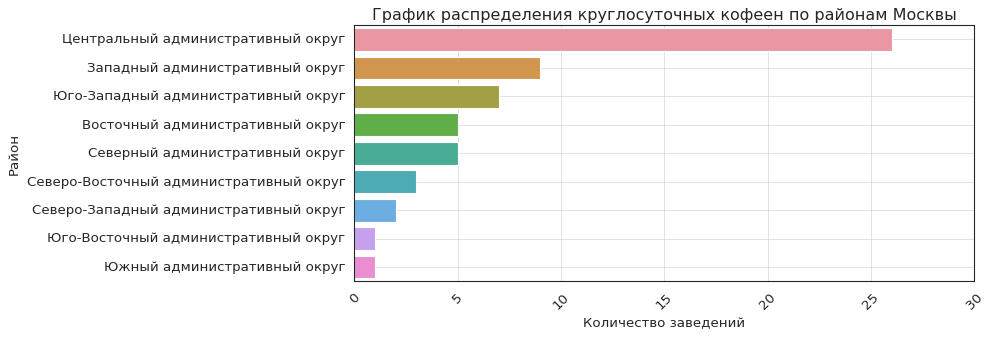

In [87]:
# назначаем классический стиль для графика с помощью matplotlib
plt.style.use('classic')
# используем стиль white из библиотеки seaborn
sns.set_style('white')
# назначаем размер графика
plt.figure(figsize=(10, 4))
# строим столбчатый график средствами seaborn
sns.barplot(x='total_count', y='district', data=coffee_24)
# формируем заголовок графика и подписи осей средствами matplotlib
plt.title('График распределения круглосуточных кофеен по районам Москвы')
plt.xlabel('Количество заведений')
plt.ylabel('Район')
# поворачиваем подписи значений по оси X на 45 градусов
plt.xticks(rotation=45)
# добавляем сетку
plt.grid()
# отображаем график на экране
plt.show()

Всего 59 круглосуточных кофеен и абсолютное большинство распоожено в Центральном АО (более 25)

### 4.3. Определим рейтинг кофеен и как они распределяются по районам.

In [88]:
coffee_avg_rating = coffee_data.groupby('district', as_index = False)['rating'].agg('mean').\
                                sort_values(by='rating', ascending=False)
coffee_avg_rating

,district,rating
5,Центральный административный округ,4.336449
4,Северо-Западный административный округ,4.325806
2,Северный административный округ,4.291710
7,Юго-Западный административный округ,4.283333
0,Восточный административный округ,4.282857
8,Южный административный округ,4.232824
6,Юго-Восточный административный округ,4.225843
3,Северо-Восточный административный округ,4.216981
1,Западный административный округ,4.195333


In [90]:
# загружаем JSON-файл с границами округов Москвы
state_geo = '/content/drive/MyDrive/Data/admin_level_geomap.geojson'
# moscow_lat - широта центра Москвы, moscow_lng - долгота центра Москвы
moscow_lat, moscow_lng = 55.751244, 37.618423

# создаём карту Москвы
m = Map(location=[moscow_lat, moscow_lng], zoom_start=10)

# создаём хороплет с помощью конструктора Choropleth и добавляем его на карту
Choropleth(
    geo_data=state_geo,
    data=coffee_avg_rating,
    columns=['district', 'rating'],
    key_on='feature.name',
    fill_color='Purples',
    fill_opacity=0.8,
    legend_name='Количество кофеен по районам',
).add_to(m)

# выводим карту
m

На хороплете видим, что самый высокий средний рейтинг у кофеен, расположенных в Центральном и Северо-Западном АО. Немнного меньше средний рейтинг у кофеен в Северном, Юго-Западном и Восточном АО. Самый низкий средний рейтинг у кофеен в Западном АО

### 4.4. Определим, на какую стоимость чашки капучино стоит ориентироваться при открытии.

In [91]:
coffee_cup_median = coffee_data.groupby('district', as_index = False)['middle_coffee_cup'].median().\
                                rename(columns={'middle_coffee_cup':'coffee_cup_median_cost'}).\
                                sort_values(by='coffee_cup_median_cost', ascending=False).\
                                reset_index(drop=True) #датафрем с меианной стоимостью чашки капучино

coffee_cup_avg = coffee_data.groupby('district', as_index = False)['middle_coffee_cup'].mean().\
                             rename(columns={'middle_coffee_cup':'coffee_cup_avg_cost'}).\
                             sort_values(by='coffee_cup_avg_cost', ascending=False).\
                             reset_index(drop=True) #датафрем со средней стоимостью чашки капучино
coffee_cup_avg['coffee_cup_avg_cost'] = round(coffee_cup_avg['coffee_cup_avg_cost'], 1) #округлим среднее значение

coffee_cup_full = coffee_cup_median.merge(coffee_cup_avg, on='district', how='left')
coffee_cup_full

,district,coffee_cup_median_cost,coffee_cup_avg_cost
0,Юго-Западный административный округ,198.0,184.2
1,Центральный административный округ,190.0,187.5
2,Западный административный округ,189.0,189.9
3,Северо-Западный административный округ,165.0,165.5
4,Северо-Восточный административный округ,162.5,165.3
5,Северный административный округ,159.0,165.8
6,Южный административный округ,150.0,158.5
7,Юго-Восточный административный округ,147.5,151.1
8,Восточный административный округ,135.0,174.0


In [92]:
# строим столбчатую диаграмму
fig = px.bar(coffee_cup_median.sort_values(by='coffee_cup_median_cost', ascending=True), # загружаем данные и заново их сортируем
             x='coffee_cup_median_cost', # указываем столбец с данными для оси X
             y='district', # указываем столбец с данными для оси Y
             text='coffee_cup_median_cost') # добавляем аргумент, который отобразит текст с информацией
                                           # о количестве объявлений внутри столбца графика
# оформляем график
fig.update_layout(title='Распределение медианных цен на чашку капучино по районам',
                   xaxis_title='Медианная стоимость чашки капучино',
                   yaxis_title='Район')
fig.show() # выводим график

In [93]:
# строим столбчатую диаграмму
fig = px.bar(coffee_cup_avg.sort_values(by='coffee_cup_avg_cost', ascending=True), # загружаем данные и заново их сортируем
             x='coffee_cup_avg_cost', # указываем столбец с данными для оси X
             y='district', # указываем столбец с данными для оси Y
             text='coffee_cup_avg_cost', # добавляем аргумент, который отобразит текст с информацией
             color_discrete_sequence=["#457b9d"])

# оформляем график
fig.update_layout(title='Распределение средних цен на чашку капучино по районам',
                   xaxis_title='Средняя стоимость чашки капучино',
                   yaxis_title='Район')
fig.show() # выводим график

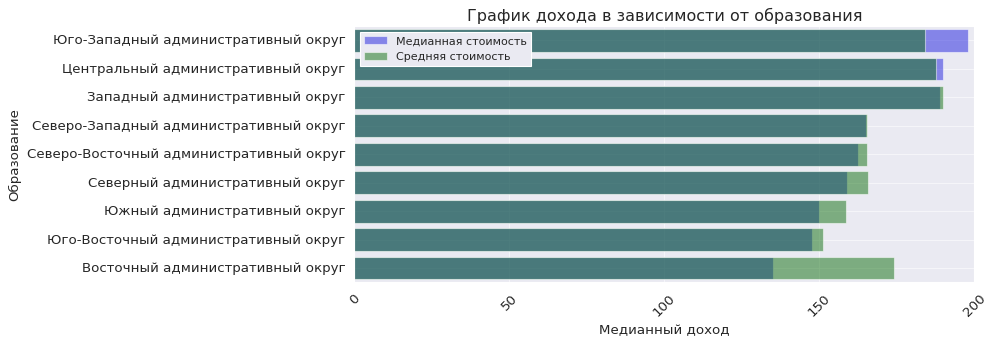

In [94]:
# используем стиль dark из библиотеки seaborn
sns.set_style('dark')
# назначаем размер графика
plt.figure(figsize=(10, 4))
# строим столбчатый график средствами seaborn
sns.barplot(x='coffee_cup_median_cost', y='district', data=coffee_cup_full,
            label='Медианная стоимость', color='blue', alpha=0.5)
sns.barplot(x='coffee_cup_avg_cost', y='district', data=coffee_cup_full,
            label='Средняя стоимость', color='green', alpha=0.5)
# формируем заголовок графика и подписи осей средствами matplotlib
plt.title('График дохода в зависимости от образования')
plt.xlabel('Медианный доход')
plt.ylabel('Образование')
# поворачиваем подписи значений по оси X на 45 градусов
plt.xticks(rotation=45)
# выбираем положение легенды и указываем размер шрифта
plt.legend(loc='upper left', fontsize=10)
# добавляем сетку
plt.grid()
# отображаем график на экране
plt.show()

Медианная стоимость больше средней в Юшо-Западном и Центральном АО.
В Западном и Северо-Западном АО медианная цена чашки капучина равна средней цене.
В остальных округах цена чашки капучино больше медианной.
На мой взгляд стоит использовать большую величину.
При открытии кофейни в Центральном АО,  стоимсть кашки капучино может быть либо 190 руб. (медиана), либо 187,5(средняя).
На мой вхгляд в данном случае предпочтительнее использовать медиану.

### 4.5. Дадим рекомендации для открытия нового заведения.

Рекомендуем открыть кафейню в Центарльном АО, поскольку именно в этом районе кофейни популярны и в них приходит достаточно гостей, чтобы им существовать и получать прибыль. Круглосуточных кофеен относительно общего их количества, совсем немного (59 заведений из 1413). Поэтому рекомендуем не выбирать данный формат. Также при открытии кофейни в Центральном АО я бы предложила ориентироваться на медианную стоимость чашки кофе - 190 руб.